In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle
import re
import string
from sklearn.metrics import confusion_matrix

In [2]:
df_fake = pd.read_csv('fake.csv')
df_true = pd.read_csv('true.csv')

In [3]:
df_true.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [4]:
df_fake.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [5]:
df_fake['class']=0
df_true['class']=1

In [6]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [7]:
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)
df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [8]:
df_fake.shape, df_true.shape

((23471, 5), (21407, 5))

In [9]:
df_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [10]:
df_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [11]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")

In [12]:
df_marge = pd.concat([df_fake, df_true], axis =0 )
df_marge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


subject
Government News     1570
Middle-east          768
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10135
Name: text, dtype: int64


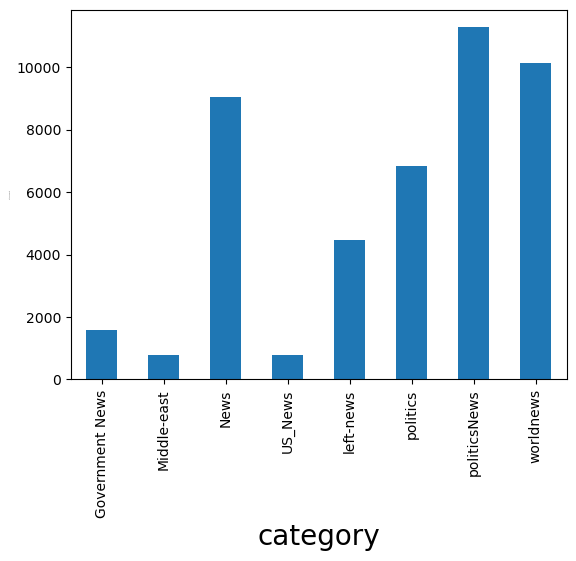

In [13]:
print(df_marge.groupby(['subject'])['text'].count())
df_marge.groupby(['subject'])['text'].count().plot(kind="bar")
plt.xlabel("category",size=20)
plt.ylabel("Article count",size=0)
plt.show()

class
0    23471
1    21407
Name: text, dtype: int64
0 = fake news
1 = true news


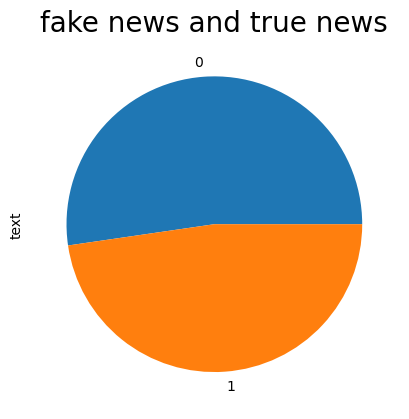

In [14]:
print(df_marge.groupby(['class'])['text'].count())
print("0 = fake news\n1 = true news")
df_marge.groupby(['class'])['text'].count().plot(kind="pie")
plt.title("fake news and true news",size=20)
plt.show()

In [15]:
df_marge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [16]:
df = df_marge.drop(["title", "subject","date"], axis = 1)

In [17]:
df.head(10)

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
5,The number of cases of cops brutalizing and ki...,0
6,Donald Trump spent a good portion of his day a...,0
7,In the wake of yet another court decision that...,0
8,Many people have raised the alarm regarding th...,0
9,Just when you might have thought we d get a br...,0


In [18]:
df = df.sample(frac = 1)

In [19]:
df.head(10)

,text,class
20664,GET OFF my fracking land!An irate farmer spray...,0
18359,An undercover Trump supporter hijacked the mic...,0
10681,WASHINGTON (Reuters) - Baltimore library chief...,1
5951,A new report reveals that Donald Trump swindle...,0
19401,WASHINGTON (Reuters) - Frequent breakdowns of ...,1
594,WASHINGTON (Reuters) - The wife of Republican ...,1
11123,"SACRAMENTO, Calif. (Reuters) - Advocates and o...",1
4713,The last thing this country needs right now is...,0
14743,BEIRUT (Reuters) - Lebanese Foreign Minister G...,1
11962,.@DiamondandSilk wasn t pleased by the underha...,0


In [20]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [21]:
df.columns

Index(['text', 'class'], dtype='object')

In [22]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [23]:
df.head(10)

,text,class
0,GET OFF my fracking land!An irate farmer spray...,0
1,An undercover Trump supporter hijacked the mic...,0
2,WASHINGTON (Reuters) - Baltimore library chief...,1
3,A new report reveals that Donald Trump swindle...,0
4,WASHINGTON (Reuters) - Frequent breakdowns of ...,1
5,WASHINGTON (Reuters) - The wife of Republican ...,1
6,"SACRAMENTO, Calif. (Reuters) - Advocates and o...",1
7,The last thing this country needs right now is...,0
8,BEIRUT (Reuters) - Lebanese Foreign Minister G...,1
9,.@DiamondandSilk wasn t pleased by the underha...,0


In [24]:
def word_drop(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [25]:
df["text"] = df["text"].apply(word_drop)

In [26]:
df.head(20)

,text,class
0,get off my fracking land an irate farmer spray...,0
1,an undercover trump supporter hijacked the mic...,0
2,washington reuters baltimore library chief...,1
3,a new report reveals that donald trump swindle...,0
4,washington reuters frequent breakdowns of ...,1
5,washington reuters the wife of republican ...,1
6,sacramento calif reuters advocates and o...,1
7,the last thing this country needs right now is...,0
8,beirut reuters lebanese foreign minister g...,1
9,diamondandsilk wasn t pleased by the underha...,0


In [27]:
x = df["text"]
y = df["class"]

In [28]:
print(x)

0        get off my fracking land an irate farmer spray...
1        an undercover trump supporter hijacked the mic...
2        washington  reuters    baltimore library chief...
3        a new report reveals that donald trump swindle...
4        washington  reuters    frequent breakdowns of ...
                               ...                        
44873    please go to the best mulch facebook page and ...
44874    dubai  reuters    yemen s steely former presid...
44875    do you think this is a good idea or is this en...
44876    des moines  iowa washington  reuters    u s  d...
44877    washington  reuters    three u s  army special...
Name: text, Length: 44878, dtype: object


In [29]:
print(y)

0        0
1        0
2        1
3        0
4        1
        ..
44873    0
44874    1
44875    0
44876    1
44877    1
Name: class, Length: 44878, dtype: int64


In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.25)

In [31]:
x_train.shape,  y_train.shape, x_test.shape

((33658,), (33658,), (11220,))

In [32]:
vector = TfidfVectorizer()
xv_train = vector.fit_transform(x_train)
xv_test = vector.transform(x_test)

In [33]:
print(xv_train)

  (0, 25411)	0.034177003335704156
  (0, 12032)	0.030157217191818325
  (0, 83175)	0.04094272840301678
  (0, 70608)	0.03084498617003581
  (0, 21820)	0.018369243510510492
  (0, 59275)	0.022043228136051106
  (0, 39105)	0.02924753875412094
  (0, 52752)	0.02984858479009326
  (0, 83555)	0.04269303718527785
  (0, 84923)	0.016299366679844697
  (0, 9623)	0.06900291808171682
  (0, 7514)	0.06788831378233219
  (0, 21413)	0.061069337780473444
  (0, 43097)	0.03954171006811534
  (0, 46076)	0.04151869518895826
  (0, 37625)	0.06455897675991285
  (0, 28610)	0.03120137534115454
  (0, 50592)	0.01879187039338754
  (0, 78029)	0.015575655636705852
  (0, 19983)	0.025295714920601318
  (0, 81772)	0.056467098088257305
  (0, 79726)	0.0173214152464954
  (0, 83807)	0.017362438842853743
  (0, 88716)	0.014734785884375767
  (0, 74985)	0.03760700438319544
  :	:
  (33657, 72883)	0.055397608343175885
  (33657, 47106)	0.03421443084913569
  (33657, 83664)	0.012139595008486716
  (33657, 39564)	0.054115178118315656
  (33657, 

In [34]:
LR = LogisticRegression()

In [35]:
LR.fit(xv_train,y_train)

LogisticRegression()

In [36]:
LR.score(xv_test, y_test)

0.9869875222816399

In [37]:
pred_lr=LR.predict(xv_test)

In [38]:
from sklearn.metrics import classification_report

In [39]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5808
           1       0.99      0.99      0.99      5412

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [40]:
from sklearn.metrics import classification_report

In [41]:
DT = DecisionTreeClassifier()

In [42]:
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [43]:
DT.score(xv_test, y_test)

0.9945632798573975

In [44]:
pred_dt = DT.predict(xv_test)

In [45]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5808
           1       0.99      0.99      0.99      5412

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [46]:
from sklearn.metrics import classification_report

In [47]:
RFC = RandomForestClassifier()

In [ ]:
RFC.fit(xv_train, y_train)

In [ ]:
pred_RFC = RFC.predict(xv_test)

In [ ]:
RFC.score(xv_test, y_test)

In [ ]:
print(classification_report(y_test, pred_RFC))

In [ ]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(word_drop) 
    new_x_test = new_def_test["text"]
    new_xv_test = vector.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]), 
                                                                                                              output_lable(pred_DT[0]), 
                                                                                                               
                                                                                                              output_lable(pred_RFC[0])))

In [ ]:
news = str(input())
manual_testing(news)

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(y_test,pred_RFC)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
import pickle
pickle.dump(LR,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(y_test,pred_lr)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(y_test,pred_dt)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()